#**AutoML_H2O_on_BankChurn**

In this assignment, you will an AutoML library like H2O.ai to create predictive models and interpret them. Find a significant relation for each algorithm of your choosing in your data. Create multivariate models.

For the moment you will assume the data is good. In future assignments, you will check your data, fix data issues and do some feature engineering. 

Answer the following questions for all of the models:

* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?

#### **Abstract**
Customer churn has become a major problem in banking industry and banks have always tried to track customer interaction with the company to detect early warning signs in customer’s behavior.In this notebook we perform classification on whether a customer would be exit or not based on some factors and patterns.

#### **Variable Description**
* `customer_id` - Account Number of customer

* `credit_score` - credit score of the customer

* `country` - country of residence

* `gender` - sex of the customer

* `age` - age of the customer

* `tenure` - from how many years he/she is having bank acc in ABC Bank

* `balance` - Account Balance in customer account

* `products_number` - Number of product from bank

* `credit_card` - if the customer has credit card? 0 -if no and 1 - if yes

* `active_member` - if he/she is active member of bank ?

* `estimated_salary` - salary of account holder

* `churn` - churn status


Dataset has **10000** entries and **12** feature with 7 nominal and 5 categorical features with 20.37% Churn Failure observations or customer leaving observations.

**Numerical features** : customer_id, credit_score, tenure, age, balance, product_number, estimated salary

**Categorical features**: country , gender , credit_card , active_number , churn

In [188]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

Wed Mar  1 02:05:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    28W /  70W |    133MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [189]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-72).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)


In [190]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [191]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing H2O AutoML

In [192]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,29 mins 55 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_ldk8dy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.120 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [193]:
from h2o.automl import H2OAutoML

In [194]:
df = h2o.import_file('https://raw.githubusercontent.com/sripoojitha-mandali/DataSciEnggMethodsandTools/main/csv/Bank_Customer_Churn_Prediction.csv?token=GHSAT0AAAAAAB6AWSU6RNFAAWFIG5H7TYF2Y6UOZXQ')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


The Bank Churn Dataset is placed in github and importing it as a raw file.

In [195]:
df.types # checking the data types of all the features

{'customer_id': 'int',
 'credit_score': 'int',
 'country': 'enum',
 'gender': 'enum',
 'age': 'int',
 'tenure': 'int',
 'balance': 'real',
 'products_number': 'int',
 'credit_card': 'int',
 'active_member': 'int',
 'estimated_salary': 'real',
 'churn': 'int'}

#### **Datatypes:**
* `Customer ID` - has integer values to identify a particular customer.
* `Credit Score` - has integer value to determine the creditworthiness of a customer.
* `Country` - The country where customer lives is of 'enum' datatype.
* `Gender` - The Sex of customer is of 'enum' datatype with two types **Male** and **Female**.
* `Age` - the age of customer is of 'integer' data type.
* `Tenure` - the Number of years the customer has Bank Account in that Bank is of integer datatype.
* `Balance` - Amount of money present in customer's bank is recorded in 'real' datatype.
* `Products Number` - has integer values for number of Products from that Bank.
* `Credit Card` - is a categorical value , yet represented in Integer to check if the customer own a credit card of that Bank.
* `Active Member` - is a categorical value , yet represented in Integer to check whether the customer is an active member of that Bank.
* `Estimated Salary` - Total Income of the Customer is represented as real.
* `Churn` - Churn (Loss of existing customers) of the Bank is a categorical value , yet represented in Integer.

In [196]:
# displaying top 5 rows of dataset
df.head(5)

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1.56346e+07,619,France,Female,42,2,0,1,1,1,101349,1
1.56473e+07,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
1.56193e+07,502,France,Female,42,8,159661,3,1,0,113932,1
1.57014e+07,699,France,Female,39,1,0,2,0,0,93826.6,0
1.57379e+07,850,Spain,Female,43,2,125511,1,1,1,79084.1,0


Displaying the first five records of the dataset to re-check the columns and sample data.

In [197]:
df.describe()

Rows:10000
Cols:12

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
type,int,int,enum,enum,int,int,real,int,int,int,real,int
mins,15565701.0,350.0,,,18.0,0.0,0.0,1.0,0.0,0.0,11.58,0.0
mean,15690940.569399998,650.5287999999998,,,38.9218,5.0128,76485.88928799999,1.530200000000001,0.7055,0.5151,100090.23988099996,0.2037
maxs,15815690.0,850.0,,,92.0,10.0,250898.09,4.0,1.0,1.0,199992.48,1.0
sigma,71936.1861227489,96.65329873613035,,,10.48780645170461,2.8921743770496837,62397.40520238598,0.5816543579989907,0.4558404644751334,0.49979692845891893,57510.49281769818,0.4027685839948609
zeros,0,0,,,0,413,3617,0,2945,4849,0,7963
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,15634602.0,619.0,France,Female,42.0,2.0,0.0,1.0,1.0,1.0,101348.88,1.0
1,15647311.0,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,15619304.0,502.0,France,Female,42.0,8.0,159660.8,3.0,1.0,0.0,113931.57,1.0


 
#### **Observations so far:**
* `credit_score` has a mean of 650 and 75% of data is distributed between 652 and 850, seems like a good distribution and may not have outliers.
* `age` has a mean of 38.9 years and maximum data is distributed between 37 years to 45 years, but the maximum value is 92 years which might be slightly right skewed from mean and it looks like investigation is needed to understand outliers and it will be discussed further in this notebook.
* `tenure` has a mean 5 and median is 5 and seems like a normal distribution may not have outliers.
* `balance` has mean 76485.889288 , maximum value is 250898.090000, minimum value is 0 and which is slightly left skewed from mean.
* `estimated_balance` has mean 100090.239881 and a median(2nd quantile) of 100193.915000 which is almost a normal distribution.

All the quantile information 

In [198]:
pdf = pd.read_csv("https://raw.githubusercontent.com/sripoojitha-mandali/DataSciEnggMethodsandTools/main/csv/Bank_Customer_Churn_Prediction.csv?token=GHSAT0AAAAAAB6AWSU6RNFAAWFIG5H7TYF2Y6UOZXQ")
pdf.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


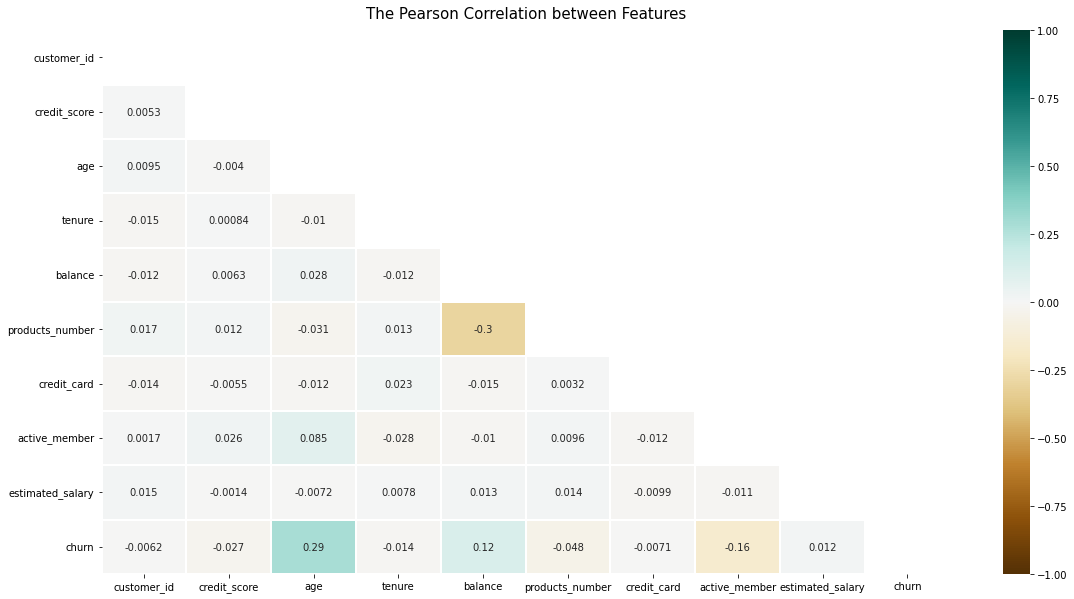

In [199]:
# For Data Visualization
import numpy as np
data_corr = pdf.corr()
mask = np.triu(np.ones_like(pdf.corr(), dtype=bool))
corr_ft = plt.figure(figsize= (19, 10))
corr_ft = sns.heatmap(data_corr, mask=mask,vmin= -1, vmax = 1, annot=True, linewidths= 0.3, cmap= "BrBG")
corr_ft.set_title("The Pearson Correlation between Features",
                   fontsize= 15,
                   pad= 12)
plt.show()

#### **Observations**
- `age` and `active_member` are slightly positively correlated. Hence we can say that older customers are more likely to churn than the younger ones.
- `balance` and `products_number` are negatively correlated.
- `churn` shows some correlation with `age` comparing to other features.

#### **Identifing predictor significance**

In [200]:
numerical_feats = pdf.select_dtypes(include='number').columns.tolist()
categorical_feats = pdf.select_dtypes(include='object').columns.tolist()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in categorical_feats:
    # Fit the label encoder to the dataframe column
    le.fit(pdf[column])
    # Replace the dataframe column with the encoded values
    pdf[column] = le.transform(pdf[column])

print(pdf)

      customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619        0       0   42       2       0.00   
1        15647311           608        2       0   41       1   83807.86   
2        15619304           502        0       0   42       8  159660.80   
3        15701354           699        0       0   39       1       0.00   
4        15737888           850        2       0   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771        0       1   39       5       0.00   
9996     15569892           516        0       1   35      10   57369.61   
9997     15584532           709        0       0   36       7       0.00   
9998     15682355           772        1       1   42       3   75075.31   
9999     15628319           792        0       0   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0         

In [201]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(pdf['churn'], pdf[['credit_score','country','gender','age','tenure','balance','products_number','credit_card','active_member','estimated_salary']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  churn   R-squared (uncentered):                   0.312
Model:                            OLS   Adj. R-squared (uncentered):              0.311
Method:                 Least Squares   F-statistic:                              452.4
Date:                Wed, 01 Mar 2023   Prob (F-statistic):                        0.00
Time:                        02:05:55   Log-Likelihood:                         -4366.4
No. Observations:               10000   AIC:                                      8753.
Df Residuals:                    9990   BIC:                                      8825.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
credit_score        -0.0002   2.62e-05     -7.048      0.000      -0.000      -0.000
country              0.0106      0.005      2.342      0.019       0.002       0.019
gender              -0.0807      0.007    -10.810      0.000      -0.095      -0.066
age                  0.0108      0.000     33.126      0.000       0.010       0.011
tenure              -0.0026      0.001     -2.070      0.039      -0.005      -0.000
balance           6.389e-07   6.18e-08     10.340      0.000    5.18e-07     7.6e-07
products_number     -0.0121      0.006     -1.902      0.057      -0.025       0.000
credit_card         -0.0075      0.008     -0.931      0.352      -0.023       0.008
active_member       -0.1449      0.008    -19.267      0.000      -0.160      -0.130
estimated_salary  3.204e-08    6.4e-08      0.501      0.617   -9.34e-08    1.57e-07
==============================================================================
Omnibus:                     1529.497   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2355.385
Skew:                           1.186   Prob(JB):                         0.00
Kurtosis:                       3.169   Cond. No.                     3.03e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### **Pointes to be noted:**
Considering the significance value of 0.05 according to the rule of thumb in statistics.

* `credit_score` has the p-value 0.00, which is lesser and hence it is a **significant** feature.
* `country` has p-value 0.019, which is lesser and hence it is a **significant** feature.
* `gender` has p-value 0.0, which is lesser and hence it is a **significant** feature.
*  `age` has the p-value 0, which is lesser and hence it is a **significant** feature.
*  `tenure` has the p-value 0.014, which is which is slightly more than the threshold value of 0.05 and hence it is a **significant** feature.
* `balance` has the p-value 0, which is lesser and hence it is a **significant** feature.
* `products_number` has the p-value 0.037, which is lesser and hence it is a **significant** feature.
* `credit_card` has the p-value 0.214, which is greater than the significant value i.e 0.05 and hence it is a **non-significant** feature.
* `active_member` has the p-value 0, which is lesser and hence it is a **significant** feature.
* `estimated_salary` has the p-value 0.747, which is greater and hence it is a **non-significant** feature.

In [202]:
df["churn"] = df["churn"].asfactor()

Converting `churn` column to enum as it is given integer but need to classify it

In [203]:
df.types

{'customer_id': 'int',
 'credit_score': 'int',
 'country': 'enum',
 'gender': 'enum',
 'age': 'int',
 'tenure': 'int',
 'balance': 'real',
 'products_number': 'int',
 'credit_card': 'int',
 'active_member': 'int',
 'estimated_salary': 'real',
 'churn': 'enum'}

`churn` converted to enum as show above

In [204]:
train,test,valid = df.split_frame(ratios=[.7, .15])

####**Splitting train test and vailidation into 70:15:15 ratio**

In [205]:
y = "churn"
x = df.columns
x.remove(y)
x.remove("customer_id")




- Here the target feature is `churn` for binary classification.
- Removing `customer_id` as customer id is just unique identifier that is randomly allocated to a customer and dont contribute for the analysis

#### **Initializes an H2O AutoML object**
The command below initializes an H2O AutoML object with specific settings to limit the number of models built, exclude certain algorithms, and control the verbosity and cross-validation settings. 

In [206]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

- Using the **H2OAutoML model** to use max of **10 models** for model slection and hyperparameter since the more the no of models we intialise , the more time it will take.
- intialising the nfold variable to 0 since **nfold** default value is 5 it will carryout 5 cross validations which is not required in our case since we already have validation set.
- Excluding **StackedEnsemble and DeepLearning** as it is more complex at this moment and it is also an expensive process

In [207]:
#check on GPU usage
!nvidia-smi

Wed Mar  1 02:05:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    28W /  70W |    133MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

0 MB of GPU used before running the train function

In [208]:
aml.train(x = x, y = y, training_frame = train, validation_frame=valid)

AutoML progress: |
02:05:56.94: Project: AutoML_5_20230301_20556
02:05:56.94: Cross-validation disabled by user: no fold column nor nfolds > 1.
02:05:56.94: Setting stopping tolerance adaptively based on the training frame: 0.011968540149150156
02:05:56.94: Build control seed: 10
02:05:56.94: training frame: Frame key: AutoML_5_20230301_20556_training_py_52_sid_845f    cols: 12    rows: 6981  chunks: 8    size: 159530  checksum: 8946387945695901514
02:05:56.94: validation frame: Frame key: py_54_sid_845f    cols: 12    rows: 1505  chunks: 8    size: 58230  checksum: 5678570419150563908
02:05:56.94: leaderboard frame: Frame key: py_54_sid_845f    cols: 12    rows: 1505  chunks: 8    size: 58230  checksum: 5678570419150563908
02:05:56.94: blending frame: NULL
02:05:56.94: response column: churn
02:05:56.94: fold column: null
02:05:56.94: weights column: null
02:05:56.94: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_5_20230301_20556


Model Summary: 
    number_of_trees
--  -----------------
    40

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.07915909381626376
RMSE: 0.2813522593054191
LogLoss: 0.26661199511629263
Mean Per-Class Error: 0.1620678597139859
AUC: 0.9228407348431233
AUCPR: 0.8148172733889714
Gini: 0.8456814696862467

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30653385739577443
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      5103  465   0.0835   (465.0/5568.0)
1      340   1073  0.2406   (340.0/1413.0)
Total  5443  1538  0.1153   (805.0/6981.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.306534     0.727211  211
max f2                       0.162109     0.77104   275
max f0point5                 0.575986     0.777208  121
max accuracy                 0.476769     0.895144  152
max precision                0.996607     1         0
max recall                   0.0137087    1         389
max specificity              0.996607     1         0
max absolute_mcc             0.385553     0.658238  182
max min_per_class_accuracy   0.20448      0.836518  255
max mean_per_class_accuracy  0.254282     0.843449  231
max tns                      0.996607     5568      0
max fns                      0.996607     1405      0
max fps                      0.00378506   5568      399
max tps                      0.0137087    1413      389
max tnr                      0.996607     1         0
max fnr                      0.996607     0.994338  0
max fpr                      0.00378506   1         399
max tpr                      0.0137087    1         389

Gains/Lift Table: Avg response rate: 20.24 %, avg score: 20.34 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100272                   0.974339           4.94055     4.94055            1                0.986757   1                           0.986757            0.04954         0.04954                    394.055   394.055            0.04954
2        0.0200544                   0.948271           4.94055     4.94055            1                0.962494   1                           0.974625            0.04954         0.09908                    394.055   394.055            0.09908
3        0.0300817                   0.921941           4.86997     4.91703            0.985714         0.934767   0.995238                    0.961339            0.0488323       0.147912                   386.997   391.703            0.147733
4        0.0401089                   0.896235           4.79939     4.88762            0.971429         0.91053    0.989286                    0.948637            0.0481246       0.196037                   379.939   388.762            0.195498
5        0.0501361                   0.857494           4.86997     4.88409            0.985714         0.875565   0.988571                    0.934023            0.0488323       0.244869                   386.997   388.409            0.244151
6        0.100129                    0.637535           4.21858     4.55181            0.853868         0.752114   0.921316                    0.843198            0.210899        0.455768                   321.858   355.181            0.44589
7        0.150122                    0.461792           3.10023     4.06841       

####**Points Learnt:**
- Passing the input features `x` , output column `y` which is churn and training dataframe `train` and valiation dataframe `valid` as input to the train function. 
- Whenever it creates new model it updates the new leader like for `XGBoost` , `GLM`, `GBM` Gradient Boosting Model, Distributed Random Forest `DRF` and all the other models

In [209]:
#check on GPU usage after
!nvidia-smi

Wed Mar  1 02:06:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    28W /  70W |    133MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

133 MB of GPU used after running Auto Ml train function.

#### **Training the AutoML with training data** 

below, gives the leaderboard which has performance of models after training

In [210]:
lb = aml.leaderboard

In [211]:
best_model = aml.get_best_model()

Storing the best model after training on the dataset

In [212]:
print(best_model)

Model Details
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_5_20230301_20556


Model Summary: 
    number_of_trees
--  -----------------
    40

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.07915909381626376
RMSE: 0.2813522593054191
LogLoss: 0.26661199511629263
Mean Per-Class Error: 0.1620678597139859
AUC: 0.9228407348431233
AUCPR: 0.8148172733889714
Gini: 0.8456814696862467

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30653385739577443
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      5103  465   0.0835   (465.0/5568.0)
1      340   1073  0.2406   (340.0/1413.0)
Total  5443  1538  0.1153   (805.0/6981.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.306534     0.727211  211
max f2                       0.162109     0.77104   275
max f0point5     

#### **Observations on best model:**
- **Gradient Boosting Machine** is the best performing model with model key *GBM_3_AutoML_12_20230227_23505*
- `age` has the highest relative_importance with respect to the target feature `churn` and followed by `product_number`
- **AUC** (Area under ROC curve )threshold is **0.95** for train data and **0.84** for validata data. 

In [213]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_3_AutoML_5_20230301_20556,0.864065,0.333056,0.698604,0.247644,0.318478,0.101428
GBM_1_AutoML_5_20230301_20556,0.861314,0.336124,0.694213,0.241097,0.319833,0.102293
GBM_2_AutoML_5_20230301_20556,0.855776,0.339914,0.695556,0.25924,0.321553,0.103396
XGBoost_1_AutoML_5_20230301_20556,0.854874,0.346307,0.677357,0.242316,0.325583,0.106004
GBM_4_AutoML_5_20230301_20556,0.851196,0.344953,0.692189,0.253892,0.323343,0.104551
GBM_3_AutoML_5_20230301_20556,0.850289,0.343661,0.690596,0.249348,0.322665,0.104113
XGBoost_2_AutoML_5_20230301_20556,0.845552,0.357218,0.674046,0.262545,0.327716,0.107398
DRF_1_AutoML_5_20230301_20556,0.84146,0.370394,0.666965,0.25967,0.327573,0.107304
XRT_1_AutoML_5_20230301_20556,0.819718,0.375911,0.646582,0.267553,0.33722,0.113717
GLM_1_AutoML_5_20230301_20556,0.754037,0.429482,0.472823,0.31659,0.367319,0.134923



#### **Observations** :
- Displaying top models in leaderboard 
- **GBM_3_AutoML** is the top performing model based on AUC with 0.84 metric value.

Using best model from leader board to predict on test data

In [214]:
pred=aml.leader.predict(test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [215]:
aml.leader.model_performance(test)  #Checking the best model performance on test data , this is same as using best model above

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.10580832956754929
RMSE: 0.32528192321054256
LogLoss: 0.34494273778101076
Mean Per-Class Error: 0.23255710950852476
AUC: 0.8628551106757264
AUCPR: 0.7061972999264603
Gini: 0.7257102213514528

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33716409653425217
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      1067  125  0.1049   (125.0/1192.0)
1      116   206  0.3602   (116.0/322.0)
Total  1183  331  0.1592   (241.0/1514.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.337164     0.630934  184
max f2                       0.121912     0.720535  286
max f0point5                 0.597109     0.700197  107
max accuracy                 0.597109     0.860634  107
max precision                0.997069     1         0
max recall                   0.00703932   1         396
max specificity              0.997069     1         0
max absolute_mcc             0.41605      0.539635  159
max min_per_class_accuracy   0.196525     0.791107  243
max mean_per_class_accuracy  0.196525     0.793069  243
max tns                      0.997069     1192      0
max fns                      0.997069     321       0
max fps                      0.00473114   1192      399
max tps                      0.00703932   322       396
max tnr                      0.997069     1         0
max fnr                      0.997069     0.996894  0
max fpr                      0.00473114   1         399
max tpr                      0.00703932   1         396

Gains/Lift Table: Avg response rate: 21.27 %, avg score: 21.28 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010568                    0.97116            4.70186    4.70186            1                0.980778   1                           0.980778            0.0496894       0.0496894                  370.186   370.186            0.0496894
2        0.0204756                   0.952965           4.70186    4.70186            1                0.962423   1                           0.971897            0.0465839       0.0962733                  370.186   370.186            0.0962733
3        0.0303831                   0.922223           4.07495    4.49743            0.866667         0.9374     0.956522                    0.960648            0.0403727       0.136646                   307.495   349.743            0.134968
4        0.0402906                   0.897438           4.38841    4.47062            0.933333         0.911254   0.95082                     0.948502            0.0434783       0.180124                   338.841   347.062            0.177607
5        0.0501982                   0.859533           4.38841    4.4544             0.933333         0.879744   0.947368                    0.934931            0.0434783       0.223602                   338.841   345.44             0.220247
6        0.100396                    0.653081           3.27893    3.86666            0.697368         0.760309   0.822368                    0.84762             0.164596        0.388199                   227.893   286.666            0.365548
7        0.149934                    0.482851           2.44497    3.39694            0.52             0.558019   0.722467                    0.751937            0.121118        0.509317                   144.497   239.694            0.456464
8        0.200132 

#### **Metric Result:**
- MSE: 0.1029766324209348
- RMSE: 0.32089972331077943
- LogLoss: 0.34328028446655307
- Mean Per-Class Error: 0.22219085018539914
- AUC: 0.84313245305959
- AUCPR: 0.6703400387028092
- Gini: 0.6862649061191799


**Here AUC score is close to '1'. This means it is able to separate classes well.**

In [216]:
aml.leader.model_performance(valid) # model performance on validation data

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.10142831476931007
RMSE: 0.3184781229053419
LogLoss: 0.3330556881722397
Mean Per-Class Error: 0.24764385944630696
AUC: 0.8640650030552758
AUCPR: 0.6986043018284691
Gini: 0.7281300061105516

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38672515749931335
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      1129  74   0.0615   (74.0/1203.0)
1      131   171  0.4338   (131.0/302.0)
Total  1260  245  0.1362   (205.0/1505.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.386725     0.625229  159
max f2                       0.0875035    0.706244  309
max f0point5                 0.583445     0.718143  103
max accuracy                 0.583445     0.872425  103
max precision                0.991413     1         0
max recall                   0.00949053   1         393
max specificity              0.991413     1         0
max absolute_mcc             0.583445     0.553525  103
max min_per_class_accuracy   0.148501     0.771405  260
max mean_per_class_accuracy  0.146392     0.775184  261
max tns                      0.991413     1203      0
max fns                      0.991413     301       0
max fps                      0.00386965   1203      399
max tps                      0.00949053   302       393
max tnr                      0.991413     1         0
max fnr                      0.991413     0.996689  0
max fpr                      0.00386965   1         399
max tpr                      0.00949053   1         393

Gains/Lift Table: Avg response rate: 20.07 %, avg score: 19.27 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0106312                   0.972242           4.98344    4.98344            1                0.980776   1                           0.980776            0.0529801       0.0529801                  398.344   398.344            0.0529801
2        0.020598                    0.939627           4.65121    4.82269            0.933333         0.953805   0.967742                    0.967725            0.0463576       0.0993377                  365.121   382.269            0.0985065
3        0.0305648                   0.919229           4.65121    4.76677            0.933333         0.929533   0.956522                    0.955271            0.0463576       0.145695                   365.121   376.677            0.144033
4        0.0405316                   0.891037           4.31898    4.65666            0.866667         0.903731   0.934426                    0.942598            0.0430464       0.188742                   331.898   365.666            0.185417
5        0.0504983                   0.866111           4.65121    4.65559            0.933333         0.877021   0.934211                    0.929655            0.0463576       0.235099                   365.121   365.559            0.230943
6        0.100332                    0.595832           3.85386    4.25738            0.773333         0.740997   0.854305                    0.835951            0.192053        0.427152                   285.386   325.738            0.408865
7        0.150166                    0.418428           2.05982    3.5281             0.413333         0.496733   0.707965                    0.723379            0.102649        0.529801                   105.982   252.81             0.474938
8        0.2         

- MSE: 0.10767991858594855
- RMSE: 0.32814618478042457
- LogLoss: 0.3561277328975852
- Mean Per-Class Error: 0.24791752326130326
- AUC: 0.8419551169791017
- AUCPR: 0.6809326075386171
- Gini: 0.6839102339582035

**Here AUC score is close to '1'. This means it is able to separate classes well.**

In [217]:
perf = aml.leader.model_performance(test)
perf.accuracy()

[[0.5971086621284485, 0.8606340819022457]]

#### **Fetching all the model_ids**





In [218]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [219]:
model_ids

['XGBoost_3_AutoML_5_20230301_20556',
 'GBM_1_AutoML_5_20230301_20556',
 'GBM_2_AutoML_5_20230301_20556',
 'XGBoost_1_AutoML_5_20230301_20556',
 'GBM_4_AutoML_5_20230301_20556',
 'GBM_3_AutoML_5_20230301_20556',
 'XGBoost_2_AutoML_5_20230301_20556',
 'DRF_1_AutoML_5_20230301_20556',
 'XRT_1_AutoML_5_20230301_20556',
 'GLM_1_AutoML_5_20230301_20556']

In [220]:
best_model.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_3_AutoML_5_20230301_20556',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_3_AutoML_5_20230301_20556'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_5_20230301_20556_training_py_52_sid_845f',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_5_20230301_20556_training_py_52_sid_845f'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_5_20230301_20556_training_py_52_sid_845f',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_5_20230301_20556_training_py_52_sid_845f'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_

- the above H2O paramters give too much information which cannot be understood easily.
- It can be understood by converting H2O param to GBM param.



In [221]:
best_model.confusion_matrix()

,0,1,Error,Rate
0,5103.0,465.0,0.0835,(465.0/5568.0)
1,340.0,1073.0,0.2406,(340.0/1413.0)
Total,5443.0,1538.0,0.1153,(805.0/6981.0)


#### **Observation** : 
- The matrix shows that out of the total 6997 instances in the dataset, the model correctly predicted 5061 instances as 0 (TN) and 1062 instances as 1 (TP). However, it incorrectly predicted 524 instances as 1 when they were actually 0 (FP), and 350 instances as 0 when they were actually 1 (FN).

- The error rate is the proportion of incorrect predictions, and in this case, it is calculated as the sum of false positives and false negatives divided by the total number of instances. So, the error rate for this model is 12.49% (874/6997).

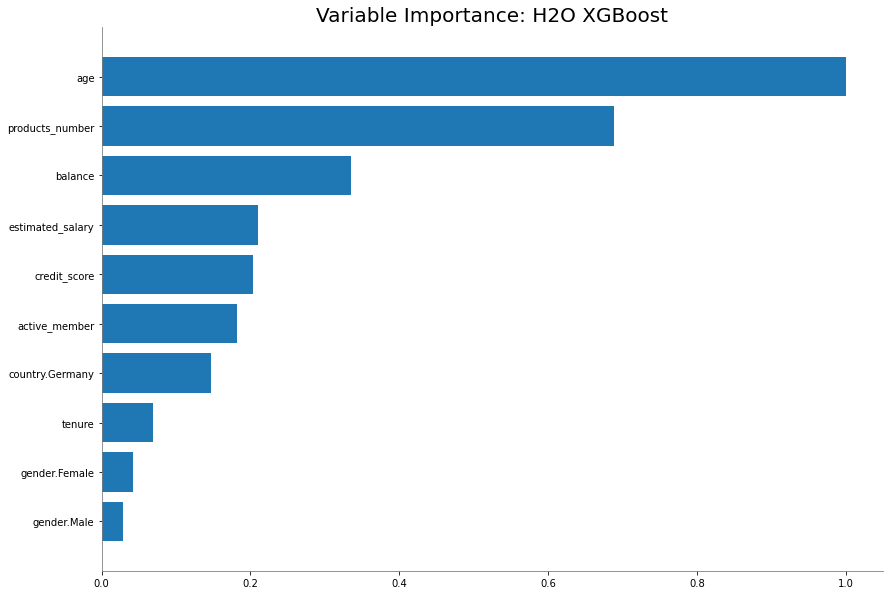

<Figure size 432x288 with 0 Axes>

In [222]:
best_model.varimp_plot()

* `age` has higher variable importance to determine the churn value if the customer exists or not.
- followed by `product_number` and `balance` 

### Questions and Answers 

1. **Is the relationship significant?**

A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P.
As per predictor signficance, all the features are significant except `credit_score` and `estimated_salary`. 

Also, visualised a pearson correlation heatmap for correlation before one hot encoding

- `age` and `active_member` are slightly positively correlated with the target feature `churn`. 
- `balance` and `products_number` are negatively correlated i.e for certain `product_number` the balance is low and vice-versa.
- `churn` shows highest correlation with `age` comparing to other features i.e higher the age then higher the chances of them exiting the bank.


2. **Are any model assumptions violated?**

There are four assumptions associated with a linear regression model:

- Linearity: The relationship between X and the mean of Y is linear.
- Homoscedasticity: The variance of residual is the same for any value of X
- Independence: Observations are independent of each other.
- Normality: For any fixed value of X, Y is normally distributed.



In [223]:
best_model.model_performance()

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.07915909381626376
RMSE: 0.2813522593054191
LogLoss: 0.26661199511629263
Mean Per-Class Error: 0.1620678597139859
AUC: 0.9228407348431233
AUCPR: 0.8148172733889714
Gini: 0.8456814696862467

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30653385739577443
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      5103  465   0.0835   (465.0/5568.0)
1      340   1073  0.2406   (340.0/1413.0)
Total  5443  1538  0.1153   (805.0/6981.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.306534     0.727211  211
max f2                       0.162109     0.77104   275
max f0point5                 0.575986     0.777208  121
max accuracy                 0.476769     0.895144  152
max precision                0.996607     1         0
max recall                   0.0137087    1         389
max specificity              0.996607     1         0
max absolute_mcc             0.385553     0.658238  182
max min_per_class_accuracy   0.20448      0.836518  255
max mean_per_class_accuracy  0.254282     0.843449  231
max tns                      0.996607     5568      0
max fns                      0.996607     1405      0
max fps                      0.00378506   5568      399
max tps                      0.0137087    1413      389
max tnr                      0.996607     1         0
max fnr                      0.996607     0.994338  0
max fpr                      0.00378506   1         399
max tpr                      0.0137087    1         389

Gains/Lift Table: Avg response rate: 20.24 %, avg score: 20.34 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100272                   0.974339           4.94055     4.94055            1                0.986757   1                           0.986757            0.04954         0.04954                    394.055   394.055            0.04954
2        0.0200544                   0.948271           4.94055     4.94055            1                0.962494   1                           0.974625            0.04954         0.09908                    394.055   394.055            0.09908
3        0.0300817                   0.921941           4.86997     4.91703            0.985714         0.934767   0.995238                    0.961339            0.0488323       0.147912                   386.997   391.703            0.147733
4        0.0401089                   0.896235           4.79939     4.88762            0.971429         0.91053    0.989286                    0.948637            0.0481246       0.196037                   379.939   388.762            0.195498
5        0.0501361                   0.857494           4.86997     4.88409            0.985714         0.875565   0.988571                    0.934023            0.0488323       0.244869                   386.997   388.409            0.244151
6        0.100129                    0.637535           4.21858     4.55181            0.853868         0.752114   0.921316                    0.843198            0.210899        0.455768                   321.858   355.181            0.44589
7        0.150122                    0.461792           3.10023     4.06841            0.627507         0.545163   0.823473                    0.743948            0.154989        0.610757                   210.023   306.841            0.577532
8        

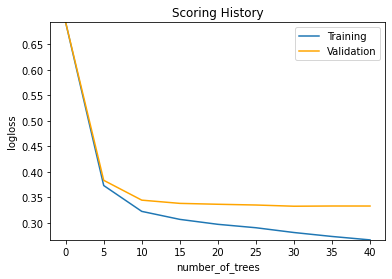

In [224]:
best_model.plot()

In [225]:

import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import seaborn as sns
df_dp=pd.read_csv("https://raw.githubusercontent.com/sripoojitha-mandali/DataSciEnggMethodsandTools/main/csv/Bank_Customer_Churn_Prediction.csv?token=GHSAT0AAAAAAB6AWSU6RNFAAWFIG5H7TYF2Y6UOZXQ")

def diagnostic_plots(df, variable):
    
    plt.figure(figsize=(20, 9))

    plt.subplot(1, 3, 1)
    sns.histplot(data = df_dp, x=variable, bins=30, kde=True)
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')
    
    plt.show()

In [226]:
#num_columns=pdf[['customer_id','credit_score','country','gender','age','tenure','balance','products_number','credit_card','active_member','estimated_salary']].columns
num_columns=df_dp[['customer_id','credit_score','age','tenure','balance','products_number','credit_card','active_member','estimated_salary']].columns
num_columns

Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary'],
      dtype='object')

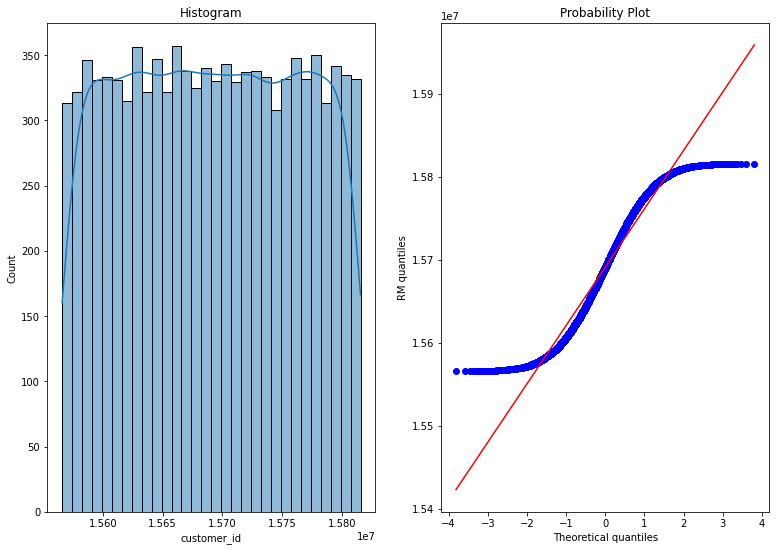

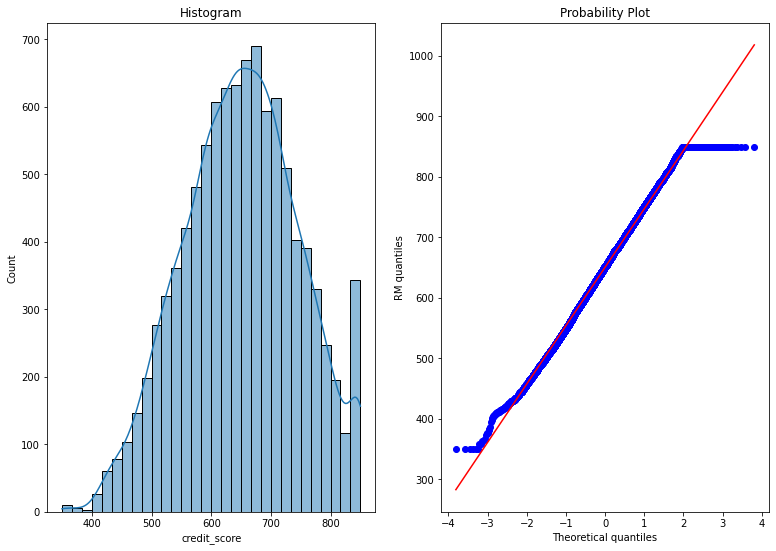

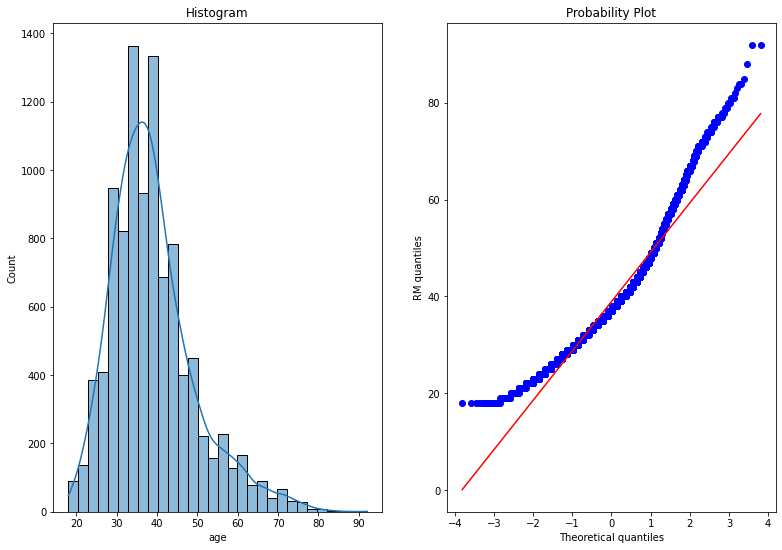

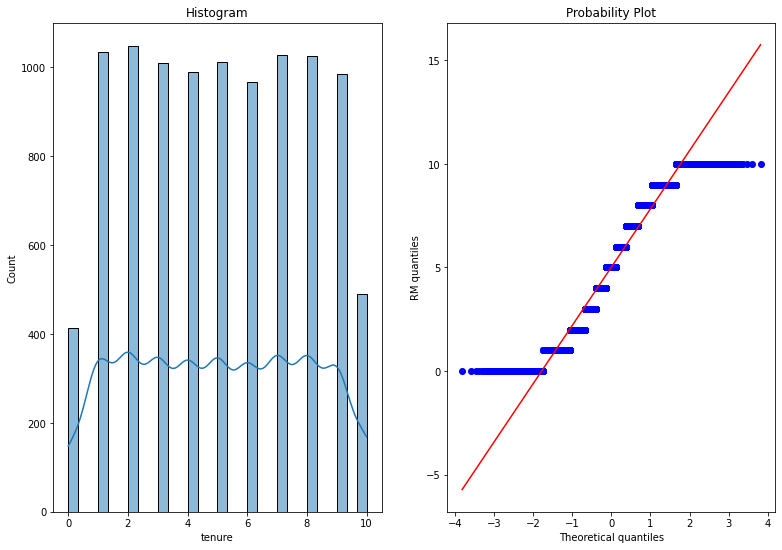

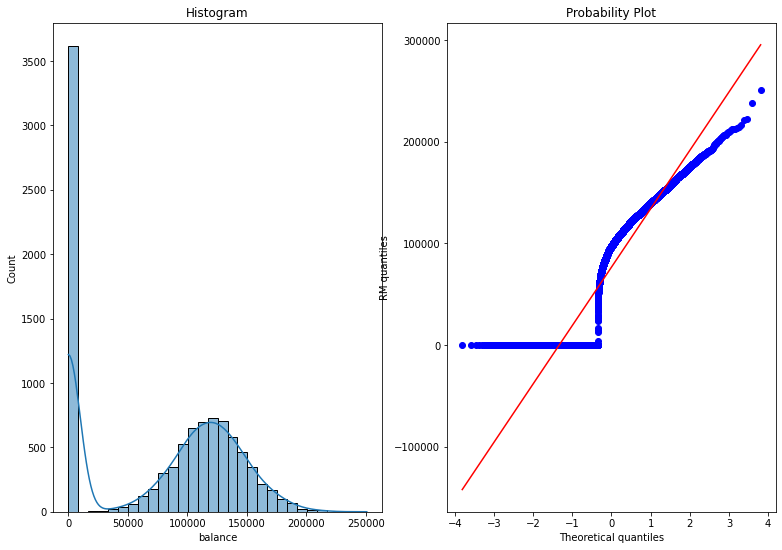

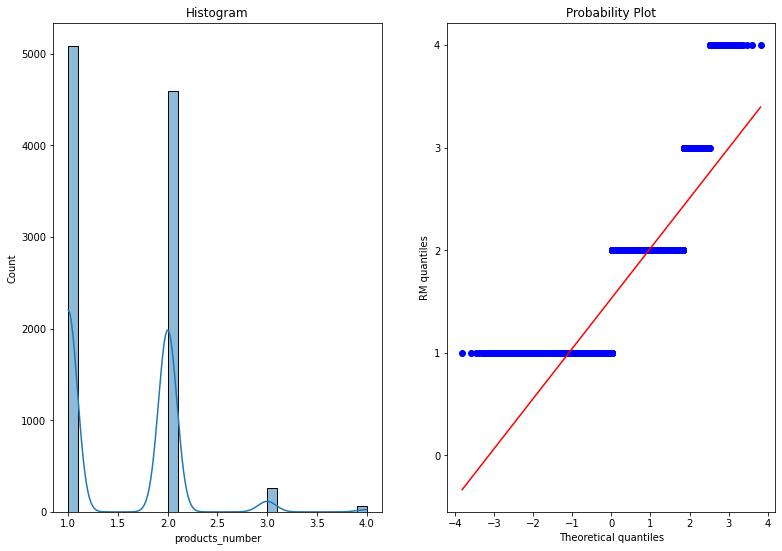

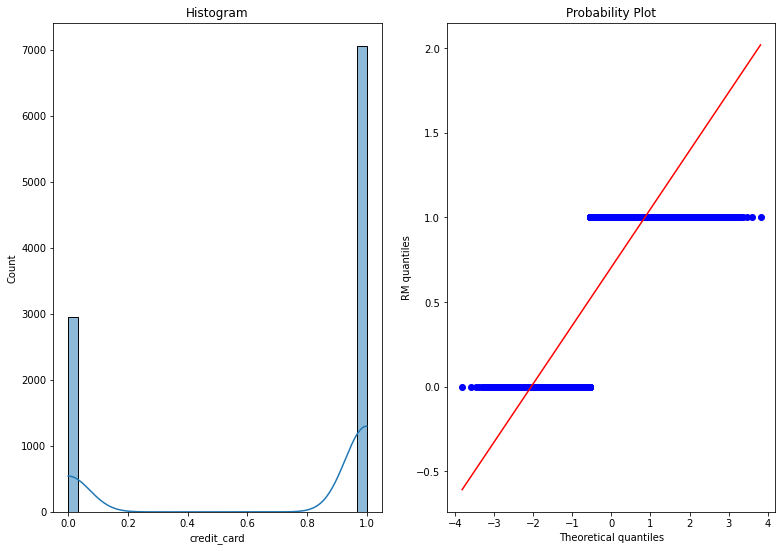

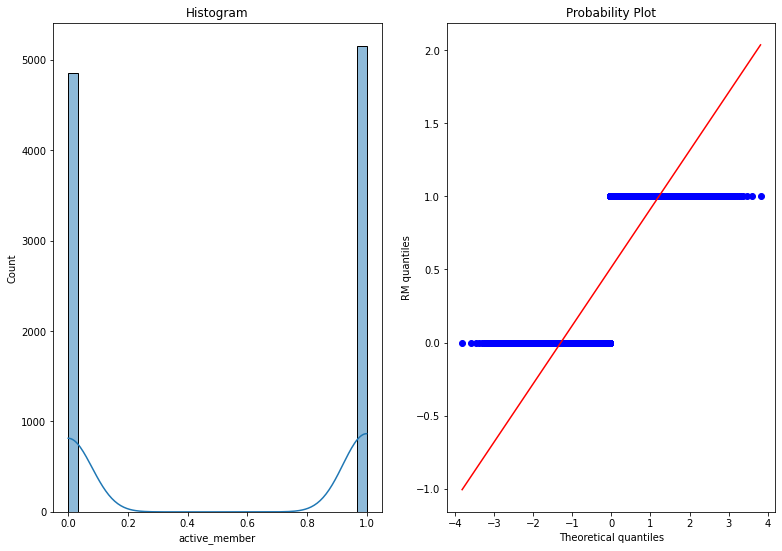

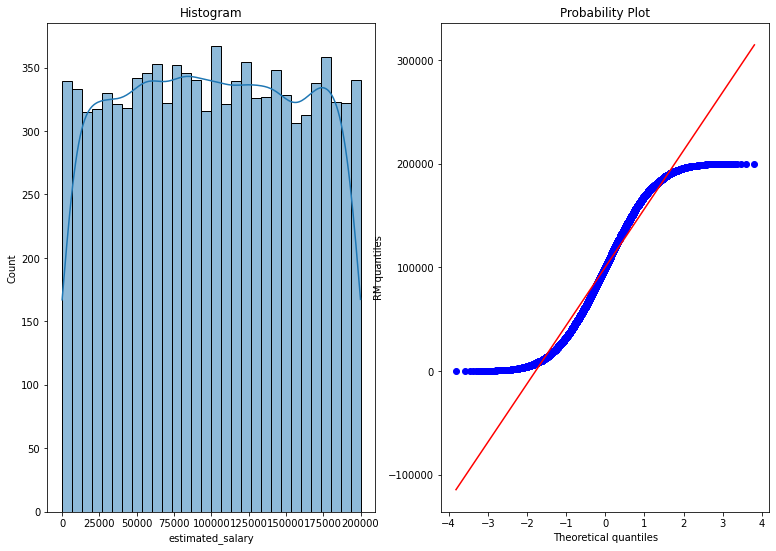

In [227]:
for i in num_columns:
    diagnostic_plots(df_dp,i)

Normalization : Data is not normally distributed hence one of the model assumption is violated.

3. **Is there any multicollinearity in the model?**

As per the Analytics Vidya multi collinearity is something which occurs when more than two independent variables are highly correlated to each other.

Multicollinearity can be determined through VIF which stands for Variance Inflation Factor.It signifies multicollinearity among set of different independent variable. A value greater than 10 means that the independent variable is highly correlated with some other variable. Will calculate VIF value for all variables to check the dependency and then will drop the variables with high VIF value.





In [228]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [229]:
# VIF dataframe

#Compute VIF
vif = pd.DataFrame()
vif["variables"] = pdf.columns
vif["VIF"] = [variance_inflation_factor(pdf.values, i) for i in range(pdf.shape[1])]
vif

,variables,VIF
0,customer_id,82.125376
1,credit_score,46.350582
2,country,1.825875
3,gender,2.229543
4,age,16.408109
5,tenure,4.011769
6,balance,2.808082
7,products_number,8.752407
8,credit_card,3.398726
9,active_member,2.158396


VIF for 'age' and 'credit_score' is greater than 10 hence it is highly co-related with another variable. 

4. **In the multivariate models are predictor variables independent of all the other predictor variables?** 

We can tell if two random variables are independent by looking at their individual probabilities. If those probabilities don’t change when the events meet, then those variables are independent. Another way of saying this is that if the two variables are correlated, then they are not independent. 
So yes the variables are NOT independent in multivariate models.




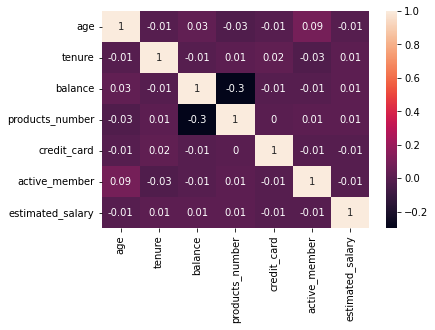

In [230]:
df_n=pd.read_csv("https://raw.githubusercontent.com/sripoojitha-mandali/DataSciEnggMethodsandTools/main/csv/Bank_Customer_Churn_Prediction.csv?token=GHSAT0AAAAAAB6AWSU6RNFAAWFIG5H7TYF2Y6UOZXQ")

df_n=df_n.iloc[:,2:-1]
cor_h2o=df_n.corr(method='pearson',min_periods=1).round(2)
sns.heatmap(cor_h2o, annot=True)
plt.show()

Few features are independent and some features are dependent on others based on heatmap shown. For examples `age` and `active_member` are slightly colinear.The same can be checked for `balance` and `product_number` with negative colinearity.


5. **In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model?**

The `varimp_plot()` a H2O.ai function that shows us the most significant predictor variable in a hierarchical manner and `age` is the most significant in this case followed by `product_number` and `balance` while `gender` and `tenure` project the least significance thereby can be excluded.

6. **Does the model make sense?**

Yes, the model makes sense. The test and validation error scores are significant with train set scores and Here the accuracy is 86%. 


ModelMetricsBinomial: gbm
** Reported on Validation data. **

- MSE: 0.10744691819522054
- RMSE: 0.3277909672264026
- LogLoss: 0.35261894456065573
- Mean Per-Class Error: 0.22668308702791462
- AUC: 0.8476737821565408
- AUCPR: 0.6794681635102396
- Gini: 0.6953475643130815

ModelMetricsBinomial: gbm
** Reported on test data. **

- MSE: 0.10319844172123241
- RMSE: 0.32124514272006105
- LogLoss: 0.33665769427340353
- Mean Per-Class Error: 0.23096646287435763
- AUC: 0.8662682194754563
- AUCPR: 0.6981123198576923
- Gini: 0.7325364389509126

7. **Does regularization help?**

Here model is not overfitted on test or validation data and it may not require regularization in this case.

##### **Ridge Regularization**

In [231]:
from sklearn.model_selection import  train_test_split

df_r=pd.read_csv("https://raw.githubusercontent.com/sripoojitha-mandali/DataSciEnggMethodsandTools/main/csv/Bank_Customer_Churn_Prediction.csv?token=GHSAT0AAAAAAB6AWSU6RNFAAWFIG5H7TYF2Y6UOZXQ")
X = df_r[['age','credit_score','tenure','balance','products_number','credit_card','active_member','estimated_salary']]
y = df_r['churn']

#Spliting data into Training 70%, Test set 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [232]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [233]:
from sklearn import metrics

# rmse after regularization
y_pred = ridge.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse


0.3782168773812506

no, the rmse from the best model is 0.32, however, in regularization, the rmse is 0.3782



8. **Which independent variables are significant?**

As per predictor signficance, all the features are significant except `credit_score` and `estimated_salary`. As per varimp_plot, `age` is the most important or significant feature to determine the target variable `churn` if the customer exists or is retained. The next significant feature is `product_number` and `balance`

9. **Which hyperparameters are important?**

max_models will let us see the number of models to be trained and display on the dataset , nfolds helps in mentioning the number of parts the dataset to be divided, exclude_algos are important by helping us not considering deep learning models if the data is not too complex, 

### Refrences:

1. H2O.ai documentation https://docs.h2o.ai/h2o/latest-stable/h2o-docs/performance-and-prediction.html
2. H2O.ai notebook reference on a different dataset for classification https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/H2O_AutoML.ipynb#scrollTo=vOxeivTyUCeq
3. H2O.ai model explainability https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html
4. Confusion metrics https://en.wikipedia.org/wiki/Confusion_matrix

**All other code and function implementation are independently written.**


Copyright 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.